In [403]:
from pathlib import Path
import numpy as np
import os

import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib notebook

from PIL import Image
import PIL

path = r"C:\Users\khoui\Nutrient_Detection\Food_Data"
from matplotlib.patches import Rectangle


import numba

In [16]:
for dirname, _, filenames in os.walk(path):
    count = 0
    for filename in filenames:
        if count > 5: # 5 files
            break
        print(os.path.join(dirname, filename))
        count = count+1
        
#show 5 files from each folder

C:\Users\khoui\Nutrient_Detection\Food_Data\evaluation\0_0.jpg
C:\Users\khoui\Nutrient_Detection\Food_Data\evaluation\0_1.jpg
C:\Users\khoui\Nutrient_Detection\Food_Data\evaluation\0_10.jpg
C:\Users\khoui\Nutrient_Detection\Food_Data\evaluation\0_100.jpg
C:\Users\khoui\Nutrient_Detection\Food_Data\evaluation\0_101.jpg
C:\Users\khoui\Nutrient_Detection\Food_Data\evaluation\0_102.jpg
C:\Users\khoui\Nutrient_Detection\Food_Data\food-11\evaluation\0_0.jpg
C:\Users\khoui\Nutrient_Detection\Food_Data\food-11\evaluation\0_1.jpg
C:\Users\khoui\Nutrient_Detection\Food_Data\food-11\evaluation\0_10.jpg
C:\Users\khoui\Nutrient_Detection\Food_Data\food-11\evaluation\0_100.jpg
C:\Users\khoui\Nutrient_Detection\Food_Data\food-11\evaluation\0_101.jpg
C:\Users\khoui\Nutrient_Detection\Food_Data\food-11\evaluation\0_102.jpg
C:\Users\khoui\Nutrient_Detection\Food_Data\food-11\training\0_0.jpg
C:\Users\khoui\Nutrient_Detection\Food_Data\food-11\training\0_1.jpg
C:\Users\khoui\Nutrient_Detection\Food_Data\

In [251]:
def show_from_path(path):
    img=mpimg.imread(path)
    plt.imshow(img)
    plt.show()
show_from_path(path + "/training/0_101.jpg")

In [255]:

img=mpimg.imread(path + "/training/0_101.jpg")
imgplot = plt.imshow(img)
plt.show()


In [253]:
train_dir = r"C:\Users\khoui\Nutrient_Detection\Food_Data\food-11\training"
test_dir = r"C:\Users\khoui\Nutrient_Detection\Food_Data\food-11\validation"

train_files = [f for f in os.listdir(train_dir) if os.path.isfile(os.path.join(train_dir, f))]
test_files = [f for f in os.listdir(test_dir) if os.path.isfile(os.path.join(test_dir, f))]

In [63]:
x_train = []
y_train = []
x_test = []
y_test = []

for file in train_files:
    x_train.append(file)
    label= file.find("_")
    y_train.append(int(file[0:label]))
for file in test_files:
    x_test.append(file)
    label= file.find("_")
    y_test.append(int(file[0:label]))

In [64]:
x_train[1]

'0_1.jpg'

In [69]:
train_dir

'C:\\Users\\khoui\\Nutrient_Detection\\Food_Data\\food-11\\training'

In [77]:
image = x_train[0]
image

'0_0.jpg'

In [86]:
path

'C:\\Users\\khoui\\Nutrient_Detection\\Food_Data'

In [93]:

image = x_train[0]




def display_train_image(image):
    img=mpimg.imread(path + r"\\training\\" + image) 
    
    return img
    #img=mpimg.imread(r"C:\Users\khoui\Nutrient_Detection\Food_Data\food-11\training\0_0.jpg") 

    
display_train_image(image)   
imgplot = plt.imshow(img)
plt.show()

AttributeError: 'AxesImage' object has no attribute 'imshow'

In [96]:
#making plates

def generate_background(image_shape=(64, 64), *, max_difference=0.1):
    ''' Generate a random background of the given shape that is a gray color with a maximum offset of
    `max_difference`.
    
    Parameters
    ----------
    image_shape : Tuple[int, int], optional (default=(64, 64))
        The shape of the background to generate.
        
    max_difference : Real ∈ [0, 1], optional (default=0.1)
        The maximum difference between any two components of the color vector.
    
    Extended Description
    --------------------
    A "perfect" gray can be considered <z, z, z>, where `z` is some color value and the vector represents RGB
    values. For example, black (<0, 0, 0>) and white (<1, 1, 1>) "perfect" grays. An imperfect gray is a color
    value that is very nearly perfect, with some maximum difference between RGB components. For example, the
    color <0.9, 0.85, 0.85> is a near-perfect, with a slight shift toward red. This function generates a random
    background of the provided shape that is a near-perfect gray.
    '''
    if max_difference == 0:
        return np.ones((*image_shape, 3)) * np.random.rand()
    
    color_vector = np.random.rand(3)
    while np.max(color_vector.reshape(1, 3) - color_vector.reshape(3, 1)) > max_difference:
        color_vector = np.random.rand(3) 
    return np.ones((*image_shape, 3)) * color_vector



In [98]:
generate_background()

array([[[0.69804494, 0.65423167, 0.60993674],
        [0.69804494, 0.65423167, 0.60993674],
        [0.69804494, 0.65423167, 0.60993674],
        ...,
        [0.69804494, 0.65423167, 0.60993674],
        [0.69804494, 0.65423167, 0.60993674],
        [0.69804494, 0.65423167, 0.60993674]],

       [[0.69804494, 0.65423167, 0.60993674],
        [0.69804494, 0.65423167, 0.60993674],
        [0.69804494, 0.65423167, 0.60993674],
        ...,
        [0.69804494, 0.65423167, 0.60993674],
        [0.69804494, 0.65423167, 0.60993674],
        [0.69804494, 0.65423167, 0.60993674]],

       [[0.69804494, 0.65423167, 0.60993674],
        [0.69804494, 0.65423167, 0.60993674],
        [0.69804494, 0.65423167, 0.60993674],
        ...,
        [0.69804494, 0.65423167, 0.60993674],
        [0.69804494, 0.65423167, 0.60993674],
        [0.69804494, 0.65423167, 0.60993674]],

       ...,

       [[0.69804494, 0.65423167, 0.60993674],
        [0.69804494, 0.65423167, 0.60993674],
        [0.69804494, 0

In [103]:
array = np.array(Image.open(path + "/training/0_101.jpg"))

In [104]:
array

array([[[103,  36,  17],
        [102,  35,  16],
        [ 87,  19,   0],
        ...,
        [193, 174, 167],
        [187, 168, 161],
        [188, 169, 163]],

       [[107,  40,  21],
        [105,  38,  19],
        [ 90,  22,   3],
        ...,
        [187, 169, 159],
        [181, 162, 155],
        [182, 163, 156]],

       [[107,  40,  21],
        [104,  37,  18],
        [ 93,  24,   8],
        ...,
        [189, 171, 159],
        [182, 164, 152],
        [184, 164, 155]],

       ...,

       [[252, 236, 115],
        [242, 225, 107],
        [241, 224, 110],
        ...,
        [200, 198, 177],
        [196, 194, 169],
        [191, 189, 164]],

       [[249, 235, 104],
        [246, 231, 102],
        [245, 229, 107],
        ...,
        [194, 192, 167],
        [196, 192, 165],
        [193, 189, 160]],

       [[228, 215,  77],
        [240, 226,  93],
        [245, 232, 102],
        ...,
        [193, 189, 162],
        [194, 190, 161],
        [194, 191, 160]]

In [154]:
train_dir = r"C:\Users\khoui\Nutrient_Detection\Food_Data\food-11\training"
test_dir = r"C:\Users\khoui\Nutrient_Detection\Food_Data\food-11\validation"

picture_list = []
#count = 0
for dirname, _, filenames in os.walk(train_dir):
    for filename in filenames:
        picture = np.array(Image.open(os.path.join(dirname, filename)))
        picture_list.append(picture)
        #count+=1
        
#show 5 files from each folder

KeyboardInterrupt: 

In [155]:
len(picture_list)

7979

In [177]:
def Image_to_array(path):
    """
    Turns singular image into array

    Parameters
    ----------
    path : string
        The path to the image
    
    Returns
    -------
    Picture array (lenght, width, 3)
    
    """
    picture = np.array(Image.open(path))
    return picture  


In [216]:
def generate_background(image_shape=(512, 512), *, max_difference=0.1):
    ''' Generate a random background of the given shape that is a gray color with a maximum offset of
    `max_difference`.
    
    Parameters
    ----------
    image_shape : Tuple[int, int], optional (default=(64, 64))
        The shape of the background to generate.
        
    max_difference : Real ∈ [0, 1], optional (default=0.1)
        The maximum difference between any two components of the color vector.
    
    Extended Description
    --------------------
    A "perfect" gray can be considered <z, z, z>, where `z` is some color value and the vector represents RGB
    values. For example, black (<0, 0, 0>) and white (<1, 1, 1>) "perfect" grays. An imperfect gray is a color
    value that is very nearly perfect, with some maximum difference between RGB components. For example, the
    color <0.9, 0.85, 0.85> is a near-perfect, with a slight shift toward red. This function generates a random
    background of the provided shape that is a near-perfect gray.
    '''
    if max_difference == 0:
        return np.ones((*image_shape, 3)) * np.random.rand()
    
    color_vector = np.random.rand(3)
    while np.max(color_vector.reshape(1, 3) - color_vector.reshape(3, 1)) > max_difference:
        color_vector = np.random.rand(3) 
    return np.ones((*image_shape, 3)) * color_vector

In [259]:
food_amount = np.random.randint(1, 4)

backround = generate_background()


x_pics_list = []
y_pics_list = []
x_pics_string = []

for i in range(food_amount):
    index = np.random.randint(0, len(x_train))
    
    x_pic = x_train[index]
    x_pic_array = Image_to_array(train_dir +"\\"+x_pic)
    
    y_pic = y_train[index]
    
    x_pics_string.append(x_pic)
    x_pics_list.append(x_pic_array)
    y_pics_list.append(y_pic)




In [237]:
len(y_pics_list)

3

In [263]:
x_pics_string[0]

'2_1305.jpg'

In [238]:
backround.shape

(512, 512, 3)

<IPython.core.display.Javascript object>


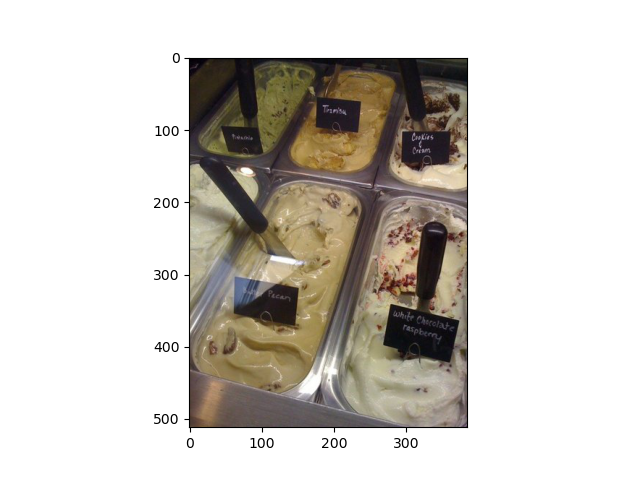

In [261]:
M = x_pics_list[0]
def show_from_matrix(pic):
    plt.imshow(pic)
    plt.show()
show_from_matrix(M)

In [275]:
im = Image.open(train_dir + "\\" +x_pics_string[0])

im.size

(384, 512)

In [277]:
maxsize = (300, 300)
im.thumbnail(maxsize, PIL.Image.ANTIALIAS)

<IPython.core.display.Javascript object>


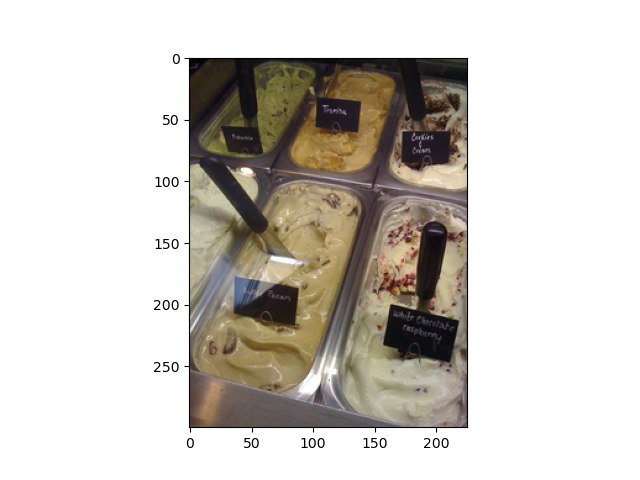

In [278]:
show_from_matrix(im)

In [279]:
im.size

(225, 300)

In [310]:
 #= Image.fromarray(backround)

backround_pillow = Image.fromarray(np.uint8(backround)).convert('RGB') #np.unit8 converts to integers, convert('RGB') converts to RGB


#PIL_image = Image.fromarray(numpy_image.astype('uint8'), 'RGB')

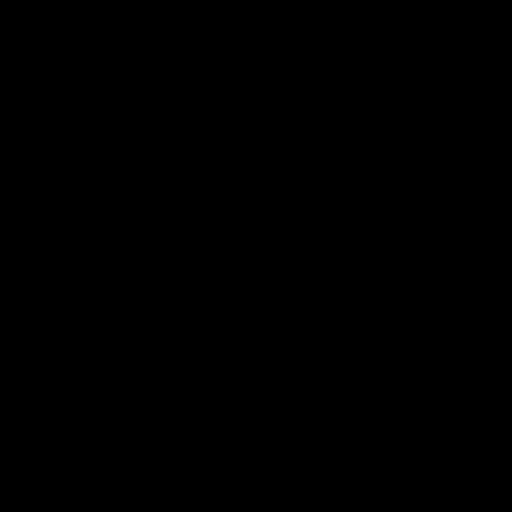

In [294]:
backround_pillow

In [295]:
backround_pillow.paste(im, (100, 50))

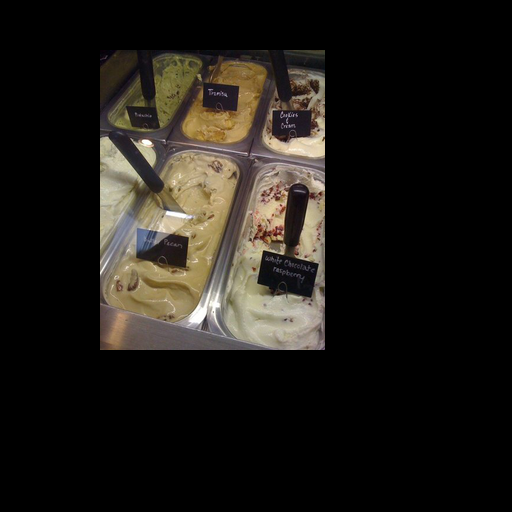

In [296]:
backround_pillow

In [364]:
backround_pillow = Image.fromarray(np.uint8(backround)).convert('RGB') #np.unit8 converts to integers, convert('RGB') converts to RGB

x_pics_list = []
x_pics_string = []
y_pics_list = []

for i in range(food_amount):
        index = np.random.randint(0, len(x_train))
        
        x_pic = x_train[index]
        x_pic_array = Image_to_array(train_dir + "\\" + x_pic)
        
        y_pic = y_train[index]
        
        
        x_pics_list.append(x_pic_array)
        x_pics_string.append(x_pic)

        y_pics_list.append(y_pic)



boxes = []
for i in range(len(x_pics_string)):

    im = Image.open(train_dir + "\\" + x_pics_string[i])

    maxsize = np.random.randint(100, 300)
                
    cood_x = np.random.randint(0, (512-maxsize))
    cood_y = np.random.randint(0, (512-maxsize))

    coordinates_tuple = cood_x, cood_y
            

        
    coord = (cood_x, cood_y)
    
    box = cood_x, cood_x, cood_x + maxsize, cood_y + maxsize # left, top, right, bottom
    
    boxes.append(box)
    
    maxsize = (maxsize, maxsize) #max size of scaled down image


    im.thumbnail(maxsize, PIL.Image.ANTIALIAS) #makes im into scaled down PIL

    backround_pillow.paste(im, coord) #paste image into backround PIL

    
    
    

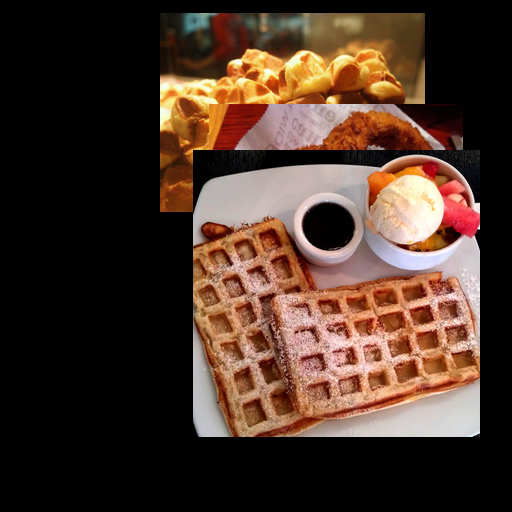

In [365]:
backround_pillow

In [366]:
backround_pillow #the image
y_pics_list[2] #the picture 
coordantaes
boxes


[(160, 160, 425, 278), (209, 209, 463, 358), (193, 193, 480, 437)]

In [371]:
def make_plate(x_train, y_train):
    """
    Makes "plates" by scaling down pictures
    Needs to create a backround and put plates in so that they don't overlap
    
    Parameters
    ----------
    x_train : images
        The names of the image files

    Y_train : labels
        The lables of the images 
    
    Returns
    -------
    Plate
        one Pillow with 1-3 pic on it

    Labels: int
        int corresponding to class

    Boxes : tuple[left, top, right, bottom] (ints)
        coord of the boxes
        
    """
    #generate backround
    food_amount = np.random.randint(1, 4)

    #backround array
    backround = generate_background()
    #backround pillow
    backround_pillow = Image.fromarray(np.uint8(backround)).convert('RGB') #np.unit8 converts to integers, convert('RGB') converts to RGB


    x_pics_list = []
    x_pics_string = []
    y_pics_list = []

    for i in range(food_amount):
            index = np.random.randint(0, len(x_train))
            
            x_pic = x_train[index]
            x_pic_array = Image_to_array(train_dir + "\\" + x_pic)
            
            y_pic = y_train[index]
            
            
            x_pics_list.append(x_pic_array)
            x_pics_string.append(x_pic)

            y_pics_list.append(y_pic)


    boxes = []
    for i in range(len(x_pics_string)):

        im = Image.open(train_dir + "\\" + x_pics_string[i])

        maxsize = np.random.randint(100, 300)
                    
        cood_x = np.random.randint(0, (512-maxsize))
        cood_y = np.random.randint(0, (512-maxsize))

        coordinates_tuple = cood_x, cood_y
                

            
        coord = (cood_x, cood_y)
        
        box = cood_x, cood_x, cood_x + maxsize, cood_y + maxsize # left, top, right, bottom
        
        boxes.append(box)
        
        maxsize = (maxsize, maxsize) #max size of scaled down image


        im.thumbnail(maxsize, PIL.Image.ANTIALIAS) #makes im into scaled down PIL

        backround_pillow.paste(im, coord) #paste image into backround PIL


    return backround_pillow, y_pics_list, boxes


In [386]:
make_plate(x_train[0], y_train[0])

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\khoui\\Nutrient_Detection\\Food_Data\\food-11\\training\\j'

In [394]:
def generate_set(base_path, num_images):
    labels, boxes = [], []
    for i in range(num_images):
        index = np.random.randint(0, num_images)
        img, lbls, bxs = make_plate(x_train, y_train)
        
        plt.imsave(f'{base_path}\\images\\{i:06d}.png', img)
        labels.append(lbls)
        boxes.append(bxs)
    np.save(f'{base_path}\\labels.npy', labels)
    np.save(f'{base_path}\\boxes.npy', boxes)

In [395]:
generate_set(r"C:\Users\khoui\Nutrient_Detection\Food_Data\Plates", 1)

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\khoui\\Nutrient_Detection\\Food_Data\\Plates\\images\\000000.png'

In [397]:
@numba.njit
def compute_iou(boxes, truth):
    ''' Return the intersection over union between two arrays of boxes.

    Parameters
    ----------
    boxes : numpy.ndarray, shape=(N, 4)
        The predicted boxes, in xyxy format.

    truth : numpy.ndarray, shape=(K, 4)
        The ground-truth boxes, in xyxy format.

    Returns
    -------
    numpy.ndarray, shape=(N, K)
        The overlap between the predicted and ground-truth boxes
    '''
    N = boxes.shape[0]
    K = truth.shape[0]
    ious = np.zeros((N, K), dtype=np.float32)

    for k in range(K):
        truth_area = (truth[k, 2] - truth[k, 0]) * (truth[k, 3] - truth[k, 1])
        for n in range(N):
            width_overlap = min(boxes[n, 2], truth[k, 2]) - \
                            max(boxes[n, 0], truth[k, 0])
            if width_overlap > 0:
                height_overlap = min(boxes[n, 3], truth[k, 3]) - \
                                 max(boxes[n, 1], truth[k, 1])
                if height_overlap > 0:
                    union = (boxes[n, 2] - boxes[n, 0]) * \
                            (boxes[n, 3] - boxes[n, 1]) + truth_area - \
                            (width_overlap * height_overlap)
                    ious[n, k] = width_overlap * height_overlap / union
    return ious

In [400]:
def generate_targets(anchor_boxes, truth_boxes, labels):
    ''' Determine the correct label and regression target for each anchor box given
    a set of truth boxes.
    
    Parameters
    ----------
    anchor_boxes : numpy.ndarray, shape=(N, 4)
        The anchor boxes, in xyxy format.
        
    truth_boxes : numpy.ndarray, shape=(K, 4)
        The ground-truth boxes, in xyxy format.
        
    labels : numpy.ndarray, shape=(K,)
        The correct object label for each of the ground-truth boxes.
        
    Returns
    -------
    Tuple[numpy.ndarray shape=(N,), numpy.ndarray shape=(N, 4)]
        (classification, regressions) for each anchor box in `anchor_boxes`.
    '''
    ious = compute_iou(anchor_boxes, truth_boxes) # NxK
    max_ious = ious.max(axis=1)                   # N IoUs
    max_idxs = ious.argmax(axis=1)                # N indices
    
    target_boxes = truth_boxes[max_idxs]

    # we want to regress the xy offset of the center and the wh offsets
    target_centers = (target_boxes[:, :2] + target_boxes[:, 2:]) / 2
    anchor_centers = (anchor_boxes[:, :2] + anchor_boxes[:, 2:]) / 2
    target_wh = target_boxes[:, 2:] - target_boxes[:, :2]
    anchor_wh = anchor_boxes[:, 2:] - anchor_boxes[:, :2]
    
    xy = (target_centers - anchor_centers) / anchor_wh # predict wrt anchor box wh
    wh = np.log(target_wh / anchor_wh)                 # predicting log keeps values small
    
    targets_reg = np.hstack([xy, wh])
    targets_cls = labels[max_idxs]
    targets_cls[max_ious < 0.3] = -1 # if our anchor has medium overlap, ignore - ambiguous
    targets_cls[max_ious < 0.2] = 0  # if our anchor has little overlap, negative

    return targets_cls, targets_reg

In [402]:
def add_detection(ax, box, label):
    ''' Add a detection box to the provided axes object.
    
    Parameters
    ----------
    ax : matplotlib.Axes
        The set of axes on which to add the detection box.
        
    box : Iterable, shape=(4,)
        The bounds of the box box, in (left, top, right, bottom) format.

    label : Union[int, str]
        The label to apply to the box.
    '''
    x, y, x2, y2 = box
    w = x2 - x
    h = y2 - y
    ax.add_patch(Rectangle((x, y), w, h, color='r', lw=2, fill=None))
    try:
        label = int(label)
        label = 'Bread' if label == 1 else label
        label = 'Dairy product' if label == 2 else label
        label = 'Dessert' if label == 3 else label
        label = 'Egg' if label == 4 else label
        label = "Fried food" if label == 5 else label
        label = 'Meat' if label == 6 else label 
        label = 'Noodles/Pasta' if label == 7 else label
        label = 'Rice' if label == 8 else label
        label = 'Seafood' if label == 9 else label
        label = 'Soup' if label == 10 else label
        label = 'Vegetable/Fruit' if label == 11 else label
        
    except:
        label = str(label)
    ax.annotate(label, (x, y), color='r')

In [405]:
def non_max_suppression(detections, threshold=0.7):
    ''' Apply non-maximum suppression to the detections provided with a given threshold.
    
    Parameters
    ----------
    detections : np.ndarray[Real], shape=(N, 5)
        The detection boxes to which to apply NMS, in (left, top, right, bottom, score) 
        format.
        
    threshold : float ∈ [0, 1], optional (default=0.7)
        The IoU threshold to use for NMS.
        
    Returns
    -------
    numpy.ndarray[int], shape=(k,)
        The indices of `detections` to keep.
    '''
    x1s = detections[:, 0]
    y1s = detections[:, 1]
    x2s = detections[:, 2]
    y2s = detections[:, 3]

    areas = (x2s - x1s) * (y2s - y1s)
    order = detections[:, 4].argsort()[::-1] # highest to lowest score

    keep = [] # which detections are we going to keep?
    while order.size > 0:
        i = order[0]
        keep.append(i)
        all_others = order[1:] # everything except the current box
        width_overlaps = np.maximum(0, np.minimum(x2s[i], x2s[all_others])  -
                                       np.maximum(x1s[i], x1s[all_others]))
        height_overlaps = np.maximum(0, np.minimum(y2s[i], y2s[all_others]) - 
                                        np.maximum(y1s[i], y1s[all_others]))
        intersections = width_overlaps * height_overlaps
        ious = intersections / (areas[i] + areas[all_others] - intersections)

        # +1 to counteract the offset all_others = order[1:]
        order = order[np.where(ious <= threshold)[0] + 1]

    return keep